# Session 2: Linear Model

You need to read the theory lectures before practicing with this notebook:
- [Preclass S2](https://hackmd.io/@KylePaul/ML_Preclass_S2)
- [Slide](https://hackmd.io/@KylePaul/ML_Slide_S2)

```{contents}

```


# Pretrained Model for Image

## Prepare the dataset

Add shortcut to your data folder: [Data set link](https://drive.google.com/file/d/1kMu3Jyll60tRlEcJSf3yifOhz_U2HWaF/view?usp=drive_link)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/lab_dataset.zip" -d "/content/"

Archive:  /content/drive/MyDrive/Colab Notebooks/ML-intensive/data/lab_dataset.zip
   creating: /content/lab_dataset/
  inflating: /content/lab_dataset/x_val.npy  
  inflating: /content/lab_dataset/y_train.npy  
  inflating: /content/lab_dataset/y_val.npy  
  inflating: /content/lab_dataset/y_cls_train.npy  
   creating: /content/lab_dataset/.ipynb_checkpoints/
  inflating: /content/lab_dataset/y_cls_val.npy  
  inflating: /content/lab_dataset/x_train.npy  
   creating: /content/lab_dataset/images/
  inflating: /content/lab_dataset/images/boxer_11.jpg  
  inflating: /content/lab_dataset/images/japanese_chin_190.jpg  
  inflating: /content/lab_dataset/images/keeshond_145.jpg  
  inflating: /content/lab_dataset/images/Egyptian_Mau_102.jpg  
  inflating: /content/lab_dataset/images/beagle_172.jpg  
  inflating: /content/lab_dataset/images/yorkshire_terrier_140.jpg  
  inflating: /content/lab_dataset/images/basset_hound_142.jpg  
  inflating: /content/lab_dataset/images/Maine_Coon_206.jpg 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("/content/lab_dataset/data.csv")
df.head()

,path,height,width,xmin,ymin,xmax,ymax,label,label_id,subset
0,images/saint_bernard_132.jpg,224,224,112,63,176,139,saint_bernard,0,train
1,images/saint_bernard_172.jpg,224,224,32,12,194,220,saint_bernard,0,train
2,images/saint_bernard_126.jpg,224,224,73,65,153,173,saint_bernard,0,train
3,images/saint_bernard_135.jpg,224,224,124,41,170,117,saint_bernard,0,train
4,images/saint_bernard_171.jpg,224,224,19,12,122,104,saint_bernard,0,train


In [ ]:
len(df)

3686

In [ ]:
label_type = {
    "english_cocker_spaniel":1,
    "great_pyrenees": 1,
    "staffordshire_bull_terrier": 1,
    "pomeranian": 1,
    "miniature_pinscher": 1,
    "maine_coon": 0,
    "british_shorthair": 0,
    "bombay": 0,
    "chihuahua": 1,
    "basset_hound": 1,
    "birman": 0,
    "russian_blue": 0,
    "persian": 0,
    "beagle": 1,
    "shiba_inu": 1,
    "boxer": 1,
    "scottish_terrier": 1,
    "wheaten_terrier": 1,
    "keeshond": 1,
    "siamese": 0,
    "japanese_chin": 1,
    "english_setter": 1,
    "sphynx": 0,
    "leonberger": 1,
    "american_bulldog": 1,
    "yorkshire_terrier": 1,
    "american_pit_bull_terrier": 1,
    "havanese": 1,
    "german_shorthaired": 1,
    "pug": 1,
    "newfoundland": 1,
    "abyssinian": 0,
    "saint_bernard": 1,
    "samoyed": 1,
    "ragdoll": 0,
    "bengal": 0,
    "egyptian_mau": 0
}

df["label_cls"] = df["label"].map(label_type)
df.head()

,path,height,width,xmin,ymin,xmax,ymax,label,label_id,subset,label_cls
0,images/saint_bernard_132.jpg,224,224,112,63,176,139,saint_bernard,0,train,1
1,images/saint_bernard_172.jpg,224,224,32,12,194,220,saint_bernard,0,train,1
2,images/saint_bernard_126.jpg,224,224,73,65,153,173,saint_bernard,0,train,1
3,images/saint_bernard_135.jpg,224,224,124,41,170,117,saint_bernard,0,train,1
4,images/saint_bernard_171.jpg,224,224,19,12,122,104,saint_bernard,0,train,1


#### TODO 1

- What values are there in the `subset` column
- What values are there in the `label` column
- What values are there in `label_cls` column

In [ ]:
# YOUR SOLUTION
df.subset.value_counts()

train    2984
val       702
Name: subset, dtype: int64

In [ ]:
df.label.value_counts()

english_cocker_spaniel        100
great_pyrenees                100
staffordshire_bull_terrier    100
pomeranian                    100
miniature_pinscher            100
maine_coon                    100
british_shorthair             100
bombay                        100
chihuahua                     100
basset_hound                  100
birman                        100
russian_blue                  100
persian                       100
beagle                        100
shiba_inu                     100
boxer                         100
scottish_terrier              100
wheaten_terrier               100
keeshond                      100
siamese                       100
japanese_chin                 100
english_setter                100
sphynx                        100
leonberger                    100
american_bulldog              100
yorkshire_terrier             100
american_pit_bull_terrier     100
havanese                      100
german_shorthaired            100
pug           

In [ ]:
df.label_cls.value_counts() # bias

1    2498
0    1188
Name: label_cls, dtype: int64

## Basic steps to process images

In [ ]:
from PIL import Image

### Read the image

In [ ]:
df.head()

,path,height,width,xmin,ymin,xmax,ymax,label,label_id,subset,label_cls
0,images/saint_bernard_132.jpg,224,224,112,63,176,139,saint_bernard,0,train,1
1,images/saint_bernard_172.jpg,224,224,32,12,194,220,saint_bernard,0,train,1
2,images/saint_bernard_126.jpg,224,224,73,65,153,173,saint_bernard,0,train,1
3,images/saint_bernard_135.jpg,224,224,124,41,170,117,saint_bernard,0,train,1
4,images/saint_bernard_171.jpg,224,224,19,12,122,104,saint_bernard,0,train,1


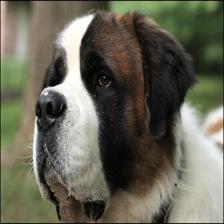

In [ ]:
# Đọc file ảnh và chuyển thành np array
im = Image.open("/content/lab_dataset/images/saint_bernard_172.jpg")
im_array = np.array(im)
im

In [ ]:
im_array

array([[[ 22,   4,   0],
        [ 82,  64,  50],
        [ 54,  38,  23],
        ...,
        [ 15,  21,   9],
        [ 20,  26,  14],
        [  0,   3,   0]],

       [[126, 108,  94],
        [212, 194, 180],
        [194, 178, 163],
        ...,
        [ 50,  56,  42],
        [ 49,  55,  41],
        [ 20,  26,  12]],

       [[111,  93,  79],
        [222, 204, 190],
        [218, 200, 186],
        ...,
        [ 51,  60,  39],
        [ 49,  58,  39],
        [ 19,  28,   9]],

       ...,

       [[ 56,  57,  41],
        [111, 112,  94],
        [110, 111,  93],
        ...,
        [184, 185, 179],
        [178, 179, 173],
        [ 78,  79,  73]],

       [[ 71,  72,  56],
        [120, 121, 105],
        [112, 113,  95],
        ...,
        [176, 177, 171],
        [182, 183, 177],
        [ 95,  96,  90]],

       [[  0,   2,   0],
        [ 40,  43,  26],
        [ 27,  30,  13],
        ...,
        [ 46,  47,  41],
        [ 73,  74,  68],
        [  4,   5,   0]]

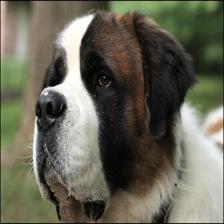

In [ ]:
# Read the image from numpy array
im = Image.fromarray(im_array)
im

### Convert

In [ ]:
# im = im.convert("L") # Grayscale image
im = im.convert("RGB") # RGB image (3 channels) (to avoid the case that the photo is PNG with a transparent background)

### Resize

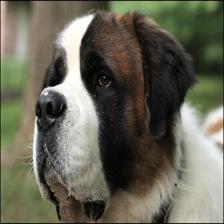

In [ ]:
# Note: width first then height
im = im.resize((224, 224))
im

### Use OpenCV Python to draw on images

>**Lưu ý**: we should not use `cv2` to read the image. Instead, we use`Pillow (PIL.Image)`

Commands and syntaxes to draw Bounding Box

```python
import cv2

im_array = cv2.rectangle(im_array, (xmin, ymin), (xmax, ymax), rgb_color_code, thickness)
```

Word drawing syntax (English only)
```python
im_array = cv2.putText(
    im_array,
    "Saint Bernard",
    (x, y), # coordinates x,y to start drawing
    cv2.FONT_HERSHEY_COMPLEX,
    0.5, # magnitude of words
    (255,0,0), # color
    1, # thickness
    cv2.LINE_AA)
```

In addition, the library `cv2` also supports many other types of drawing, we will learn gradually

In [ ]:
df.head()

,path,height,width,xmin,ymin,xmax,ymax,label,label_id,subset,label_cls
0,images/saint_bernard_132.jpg,224,224,112,63,176,139,saint_bernard,0,train,1
1,images/saint_bernard_172.jpg,224,224,32,12,194,220,saint_bernard,0,train,1
2,images/saint_bernard_126.jpg,224,224,73,65,153,173,saint_bernard,0,train,1
3,images/saint_bernard_135.jpg,224,224,124,41,170,117,saint_bernard,0,train,1
4,images/saint_bernard_171.jpg,224,224,19,12,122,104,saint_bernard,0,train,1


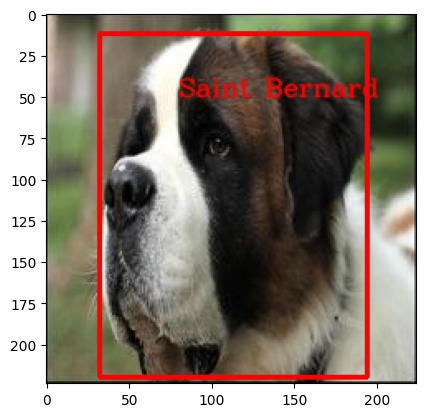

In [ ]:
import cv2

im_array = np.array(im)
im_array = cv2.rectangle(im_array, (32, 12), (194, 220), (255,0,0), 2)
im_array = cv2.putText(
    im_array,
    "Saint Bernard",
    (80, 50),
    cv2.FONT_HERSHEY_COMPLEX,
    0.5, (255,0,0), 1, cv2.LINE_AA)
plt.imshow(im_array)
plt.show()

## Pretrained Image Model

In [ ]:
import tensorflow.keras.applications as model_zoo
base_model = model_zoo.MobileNetV3Small(include_top=False,
                                        weights='imagenet',
                                        alpha=0.75,
                                        pooling="avg")

base_model.trainable = False # freeze pretrained weights
base_model.training=False # set to inference mode

2910456/2910456 [==============================] - 1s 0us/step


### A common error

In [ ]:
im_array = np.array(im)
im_array.shape

(224, 224, 3)

In [ ]:
im_array = np.array(im)
embedding = base_model(im_array)
print(embedding.shape)

- AI models always receive data in the form of `(batch_size, others)` which means that the first dimension of data is always the number of samples that we put into the model.

- In the above case, we include an image with the shape `(224, 224, 3)` that is missing the first dimension of `batch_size` so the Tensorflow library will report an error.

In [ ]:
im_array = np.expand_dims(im_array, axis=0)
im_array.shape

(1, 224, 224, 3)

In [ ]:
embedding = base_model(im_array)
embedding.shape

TensorShape([1, 432])

The result of the return model will also have the first data dimension of `batch_size` (in this case, `1`)

You can either run the cell code below to get the train and validation test (this would cost time) or you can load from the folder dataset that I had done and saved.

In [ ]:
from tqdm import tqdm

x_train = []
y_train = []
y_cls_train = []

x_val = []
y_val = []
y_cls_val = []

for index, row in tqdm(df.iterrows(), total=df.shape[0]):
  im = Image.open(f"/content/lab_dataset/{row['path']}")
  im = np.array(im)[None, ...]
  embedding = base_model(im, training=False)
  x1, y1, x2, y2 = row["xmin"], row["ymin"], row["xmax"], row["ymax"]
  # normalize to (0,1) for model learn better
  x1 = x1 / 224
  x2 = x2 / 224
  y1 = y1 / 224
  y2 = y2 / 224

  if row["subset"] == "train":
    x_train.append(embedding)
    y_train.append([x1,y1,x2,y2])
    y_cls_train.append(row["label_cls"])
  else:
    x_val.append(embedding)
    y_val.append([x1,y1,x2,y2])
    y_cls_val.append(row["label_cls"])

x_train = np.array(x_train)
y_train = np.array(y_train)
y_cls_train = np.array(y_cls_train)

x_val = np.array(x_val)
y_val = np.array(y_val)
y_cls_val = np.array(y_cls_val)

In [ ]:
x_train = np.load("/content/lab_dataset/x_train.npy")
y_train = np.load("/content/lab_dataset/y_train.npy")
y_cls_train = np.load("/content/lab_dataset/y_cls_train.npy")

x_val = np.load("/content/lab_dataset/x_val.npy")
y_val = np.load("/content/lab_dataset/y_val.npy")
y_cls_val = np.load("/content/lab_dataset/y_cls_val.npy")

print(x_train.shape, y_train.shape, y_cls_train.shape)
print(x_val.shape, y_val.shape, y_cls_val.shape)

(2984, 1, 432) (2984, 4) (2984,)
(702, 1, 432) (702, 4) (702,)


In [ ]:
x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)

print(x_train.shape, y_train.shape, y_cls_train.shape)
print(x_val.shape, y_val.shape, y_cls_val.shape)

(2984, 432) (2984, 4) (2984,)
(702, 432) (702, 4) (702,)


## Binary Classification (Dog or Cat)

#### TODO 2
Let's design a model using Logistic Regression to predict if this is a photo containing a dog or not (if not -> cat).

>**Note:** we need to call `fit` as follows
 `history = model.fit()` to save the history of training phase.

In [ ]:
# YOUR SOLUTION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model_cls = Sequential()
input_layer = Input(shape=(432))
output_layer = Dense(1, activation="sigmoid")
model_cls.add(input_layer)
model_cls.add(output_layer)
model_cls.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_cls.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 433       
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_cls.fit(x_train, y_cls_train, validation_data=(x_val, y_cls_val), epochs=100, batch_size=128)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 0.4822 - accuracy: 0.7735 - val_loss: 0.3419 - val_accuracy: 0.8974
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2969 - accuracy: 0.9085 - val_loss: 0.2294 - val_accuracy: 0.9416
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.9350 - val_loss: 0.1806 - val_accuracy: 0.9573
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1845 - accuracy: 0.9434 - val_loss: 0.1550 - val_accuracy: 0.9615
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1642 - accuracy: 0.9481 - val_loss: 0.1369 - val_accuracy: 0.9630
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1481 - accuracy: 0.9521 - val_loss: 0.1262 - val_accuracy: 0.9630
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1370 - accuracy: 0.9541 - val_loss: 0.1164 - val_accuracy: 0.9658
Epoch 8/100


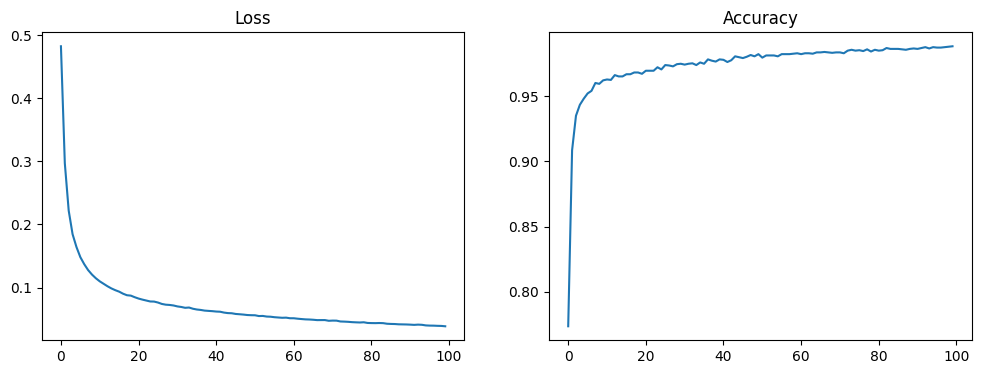

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'])

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.show()

### Combine the Preatrained Model and the model you just trained

In [ ]:
infer_model = Sequential()

infer_model.add(base_model)
infer_model.add(model_cls)

Get the image link of dog and cat:

- dog https://encrypted-tbn2.gstatic.com/licensed-image?q=tbn:ANd9GcTTmJ8ftMRt8uL4Eqr-rcyyfUtiYnvkOcDDdYDbHDtuBYid88TC4PY5d1uC16URcmLlto6MAW83I7j9oFc

- cat https://images.pexels.com/photos/1472999/pexels-photo-1472999.jpeg?auto=compress&cs=tinysrgb&dpr=1

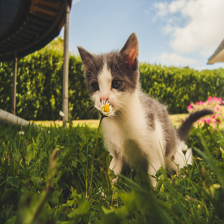

In [ ]:
from PIL import Image
import requests

im = Image.open(requests.get("https://images.pexels.com/photos/1472999/pexels-photo-1472999.jpeg?auto=compress&cs=tinysrgb&dpr=1", stream=True).raw)
im = im.convert("RGB").resize((224,224))
im

In [ ]:
im_array = np.array(im)
im_array = np.expand_dims(im_array, axis=0)
res = infer_model.predict(im_array)
print(res.shape)
print(res)

1/1 [==============================] - 2s 2s/step
(1, 1)
[[0.00011084]]


#### TODO 3

How do I convert the value of the variable 'res' above to `dog` or `cat`?


In [ ]:
# YOUR SOLUTION

# We will use threshold (here is 0.5)
"dog" if res[0] > 0.5 else "cat"

'cat'

## Object Localization

#### TODO 4
Let's design a model using Linear Regression to predict bounding box coordinates.

>**Note:** we need to call `fit` as follows `history = model.fit()` to save the hisory of training phase

In [ ]:
# YOUR SOLUTION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential()
input_layer = Input(shape=(432))
output_layer = Dense(4, activation="linear")
model.add(input_layer)
model.add(output_layer)
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 1732      
                                                                 
Total params: 1,732
Trainable params: 1,732
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_leg = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), batch_size=128)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.6425 - mae: 0.9683 - val_loss: 0.8314 - val_mae: 0.7183
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6220 - mae: 0.6164 - val_loss: 0.4951 - val_mae: 0.5560
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4231 - mae: 0.5108 - val_loss: 0.3762 - val_mae: 0.4859
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.3280 - mae: 0.4503 - val_loss: 0.3103 - val_mae: 0.4403
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.2731 - mae: 0.4106 - val_loss: 0.2646 - val_mae: 0.4069
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 0.2383 - mae: 0.3834 - val_loss: 0.2372 - val_mae: 0.3856
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.2121 - mae: 0.3616 - val_loss: 0.2157 - val_mae: 0.3667
Epoch 8/100
24/24 [==============================] - 0s 8ms/step - loss: 0.1925 - 

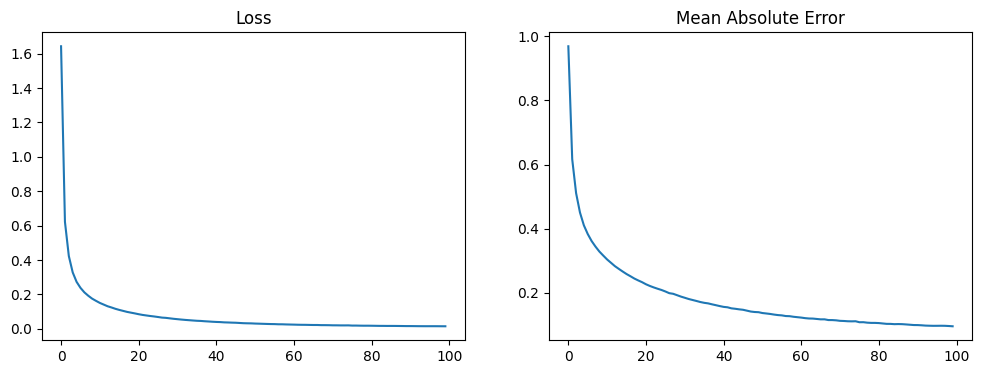

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history_leg.history['loss'])

plt.subplot(1,2,2)
plt.title('Mean Absolute Error')
plt.plot(history_leg.history['mae'])
plt.show()

In [ ]:
infer_model = Sequential()

infer_model.add(base_model)
infer_model.add(model)

In [ ]:
im = Image.open(requests.get("https://encrypted-tbn2.gstatic.com/licensed-image?q=tbn:ANd9GcTTmJ8ftMRt8uL4Eqr-rcyyfUtiYnvkOcDDdYDbHDtuBYid88TC4PY5d1uC16URcmLlto6MAW83I7j9oFc", stream=True).raw)
im = im.convert("RGB").resize((224,224))

im_array = np.array(im)
im_array = np.expand_dims(im_array, axis=0)
res = infer_model.predict(im_array)
print(res.shape)
print(res)

1/1 [==============================] - 0s 27ms/step
(1, 4)
[[ 0.1327529 -0.1267602  0.8026239  0.5593794]]


#### TODO 5

Convert the result of the model into actual coordinates and use `cv2` to draw on the image

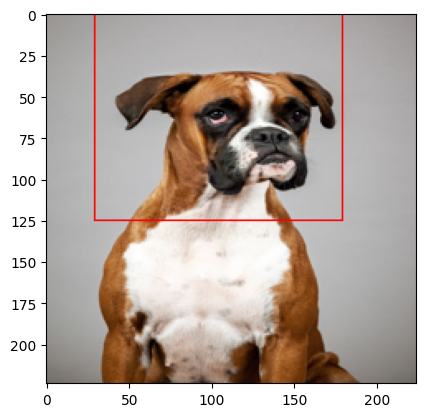

In [ ]:
# YOUR SOLUTION
res = (res[0] * 224).astype(int)
im_array = np.squeeze(im_array)
im_array = cv2.rectangle(im_array, (res[0], res[1]), (res[2], res[3]), (255,0,0), 1)
plt.imshow(im_array)
plt.show()

View the model's predictions on the train set

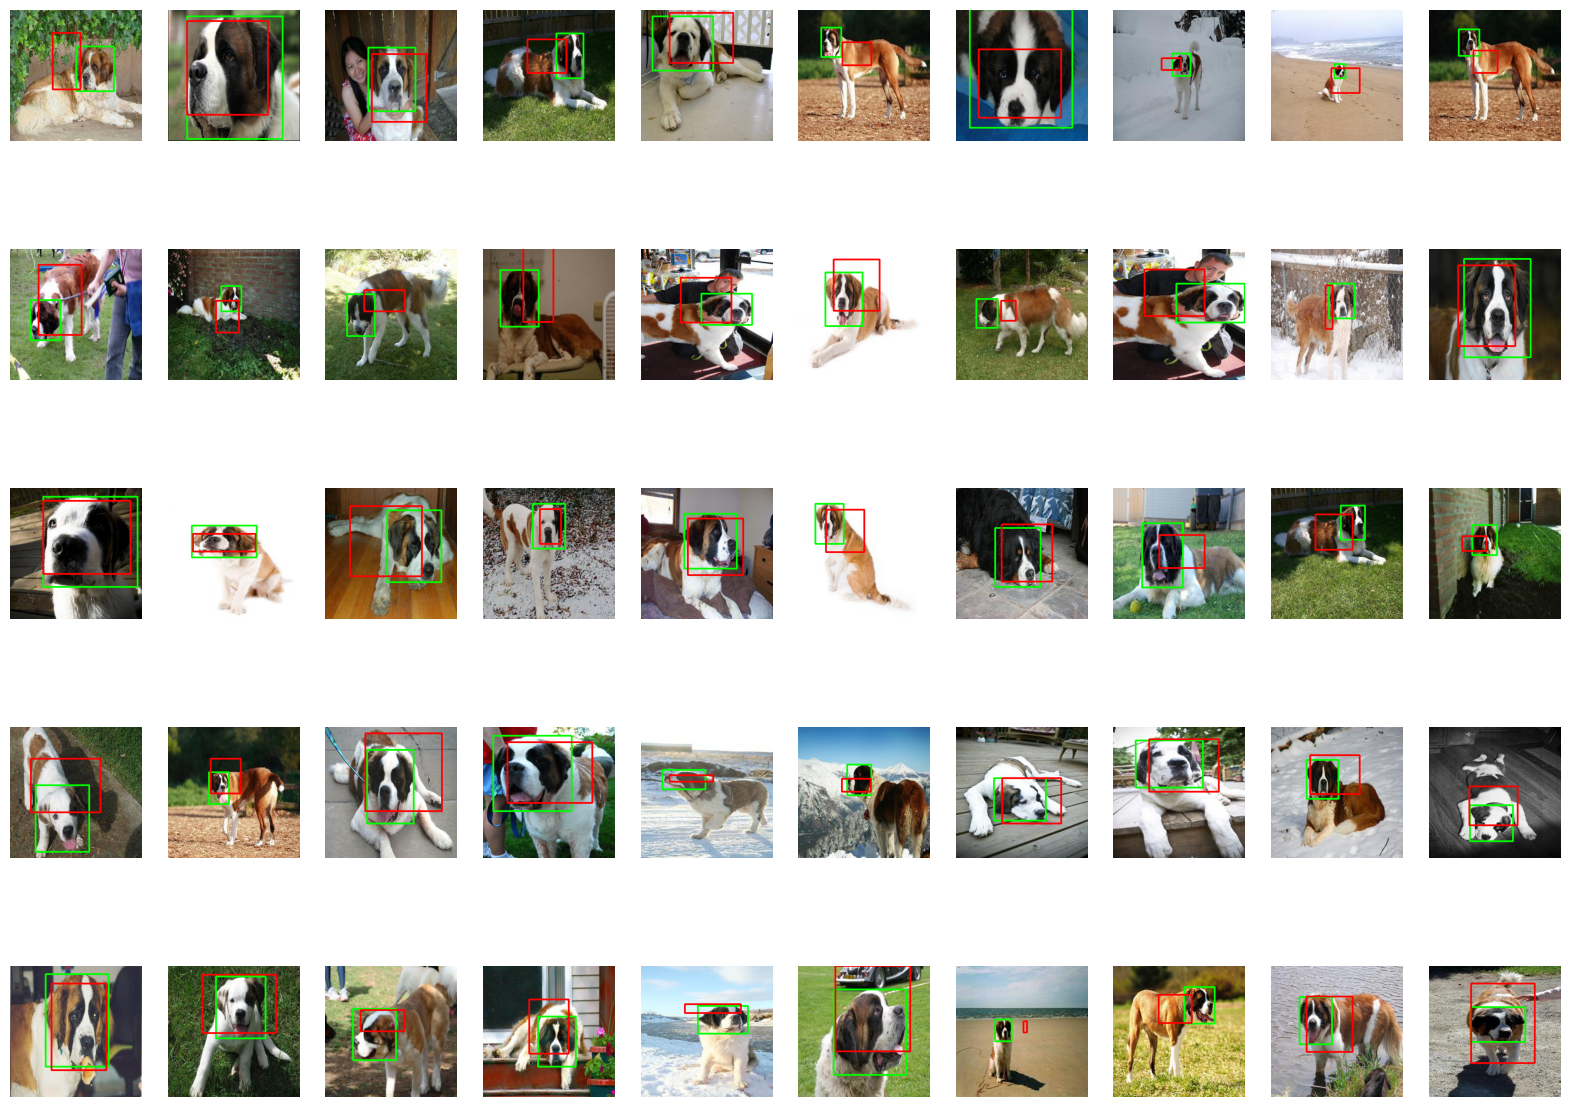

In [ ]:
temp = df[df["subset"]=="train"]

fig, axes = plt.subplots(5, 10, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
  ax.grid('off')
  ax.axis('off')
  df_row = temp.iloc[i]
  im = Image.open(f"/content/lab_dataset/{df_row['path']}")
  im_array = np.array(im)
  im_array = np.expand_dims(im_array, axis=0)
  res = infer_model.predict(im_array, verbose=0)
  res = (res[0] * 224).astype(int)

  x1 = df_row["xmin"]
  y1 = df_row["ymin"]
  x2 = df_row["xmax"]
  y2 = df_row["ymax"]

  im_array = np.squeeze(im_array)
  im_array = cv2.rectangle(im_array, (x1, y1), (x2, y2), (0,255,0), 2)
  im_array = cv2.rectangle(im_array, (res[0], res[1]), (res[2], res[3]), (255,0,0), 2)

  ax.imshow(im_array)

Most of cases, our model does not perform very well, but we will learn how to address this deficiency and improve our model in some next lessons.